### Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler # for scaling the data before implementing the elbow technique
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
%matplotlib inline

In [4]:
df = pd.read_feather(r'C:\Users\Stugots\Desktop\Bootcamp Stuff\Achievement 6 Solo Project\Data\Prepared Data\rider_ACSdemos.feather')

In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,MonthDT,Borough,ridership - Fair Fare,ridership - Full Fare,ridership - Other,ridership - Seniors & Disability,ridership - Student,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,transfer - Fair Fare,transfer - Full Fare,transfer - Other,transfer - Seniors & Disability,transfer - Students,transfers_Metrocard - Unlimited 30-Day,transfers_Metrocard - Unlimited 7-Day,Labor Force,Employed,Unemployed,Unemployment Rate (%),Year,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Median age (years),Under 18 years,16 years and over,18 years and over,21 years and over,62 years and over,65 years and over,Hispanic or Latino (of any race),White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,Total households,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more",Median household income (dollars),Mean household income (dollars)
0,01-2023,Bronx,455982.0,3374015.0,382456.0,215604.0,610250.0,675583.0,1018097.0,36609.0,336663.0,14362.0,44914.0,33186.0,0.0,1.0,607200.0,561500.0,45700.0,7.5,2023,"1,356,476","641,290","715,186","86,007","85,565","98,061","91,397","91,125","196,228","175,079","159,802","82,542","83,465","117,678","66,812","22,715",36.7,"324,775","1,064,629","1,031,701","974,718","255,886","207,205","746,248","118,663","393,136","3,929","55,696",129,"11,415","10,754","16,506","564,905","537,953","72,966","41,249","56,604","47,728","62,657","88,836","55,527","58,439","27,952","25,995","46,838","67,778"
1,01-2023,Brooklyn,784565.0,12450859.0,991470.0,747122.0,1487269.0,2250614.0,1899368.0,49188.0,657430.0,20750.0,101736.0,94613.0,0.0,1.0,1217200.0,1148000.0,69300.0,5.7,2023,"2,561,225","1,219,299","1,341,926","156,030","146,849","163,917","139,634","145,143","440,583","370,826","297,304","148,043","138,771","236,740","130,694","46,691",37.0,"557,117","2,062,593","2,004,108","1,932,158","499,932","414,125","483,037","926,994","671,188","4,352","314,427","1,013","28,472","52,037","79,705","1,110,671","1,035,549","78,973","55,416","71,940","67,165","95,843","139,476","112,041","153,992","93,854","166,849","76,912","119,171"
2,01-2023,Manhattan,1216680.0,32841413.0,2099078.0,1724836.0,1619156.0,4734871.0,4360672.0,38804.0,750144.0,30623.0,117054.0,55611.0,0.0,0.0,927200.0,884800.0,42400.0,4.6,2023,"1,597,451","761,219","836,232","62,118","58,692","59,457","72,385","105,647","332,443","231,242","189,805","87,645","98,102","158,291","100,866","40,758",39.3,"216,160","1,406,087","1,381,291","1,328,498","355,480","299,915","389,701","725,684","200,731","2,038","201,511",243,"13,023","16,276","48,244","928,727","787,747","60,225","39,773","47,497","42,459","48,770","82,992","68,309","98,515","68,826","230,381","101,078","188,118"
3,01-2023,Queens,406791.0,7820247.0,588734.0,541866.0,892048.0,1653688.0,1770402.0,47193.0,1041658.0,29979.0,122028.0,128783.0,0.0,0.0,1147100.0,1091000.0,56100.0,4.9,2023,"2,252,196","1,099,010","1,153,186","115,975","117,125","125,312","116,313","120,302","330,994","304,900","290,787","154,200","154,802","242,543","128,142","50,801",41.3,"430,852","1,867,832","1,821,344","1,756,236","511,701","421,486","632,343","521,975","368,335","8,089","587,418","1,681","48,632","35,875","47,848","917,300","863,975","53,687","31,002","53,344","58,479","80,195","124,894","104,484","153,816","89,465","114,609","81,929","110,305"
4,01-2023,Staten Island,4919.0,109014.0,12882.0,8909.0,11095.0,11878.0,8685.0,1462.0,33922.0,1456.0,3423.0,2329.0,0.0,0.0,228500.0,216400.0,12

In [7]:
# dropping columns for the sake of standardization.
df.drop(['MonthDT','Borough','Median age (years)','Unemployment Rate (%)','Year','Median household income (dollars)','Mean household income (dollars)'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   ridership - Fair Fare                                         120 non-null    float64
 1   ridership - Full Fare                                         120 non-null    float64
 2   ridership - Other                                             120 non-null    float64
 3   ridership - Seniors & Disability                              120 non-null    float64
 4   ridership - Student                                           120 non-null    float64
 5   ridership_Metrocard - Unlimited 30-Day                        120 non-null    float64
 6   ridership_Metrocard - Unlimited 7-Day                         120 non-null    float64
 7   transfer - Fair Fare                                          120 non-n

In [9]:
df.columns

Index(['ridership - Fair Fare', 'ridership - Full Fare', 'ridership - Other',
       'ridership - Seniors & Disability', 'ridership - Student',
       'ridership_Metrocard - Unlimited 30-Day',
       'ridership_Metrocard - Unlimited 7-Day', 'transfer - Fair Fare',
       'transfer - Full Fare', 'transfer - Other',
       'transfer - Seniors & Disability', 'transfer - Students',
       'transfers_Metrocard - Unlimited 30-Day',
       'transfers_Metrocard - Unlimited 7-Day', 'Labor Force', 'Employed',
       'Unemployed', 'Total population', 'Male', 'Female', 'Under 5 years',
       '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years',
       '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years',
       '60 to 64 years', '65 to 74 years', '75 to 84 years',
       '85 years and over', 'Under 18 years', '16 years and over',
       '18 years and over', '21 years and over', '62 years and over',
       '65 years and over', 'Hispanic or Latino (of any race)', '

In [10]:
#converting columns to floats to be able to get score for elbow technique
# List of columns to clean
cols_to_clean = ['Total population', 'Male', 'Female', 'Under 5 years',
       '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years',
       '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years',
       '60 to 64 years', '65 to 74 years', '75 to 84 years',
       '85 years and over', 'Under 18 years', '16 years and over',
       '18 years and over', '21 years and over', '62 years and over',
       '65 years and over', 'Hispanic or Latino (of any race)', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Two races including Some Other Race',
       'Two races excluding Some Other Race, and three or more races',
       'Total housing units', 'Total households', 'Less than 10,000',
       '10,000 to 14,999', '15,000 to 24,999', '25,000 to 34,999',
       '35,000 to 49,999', '50,000 to 74,999', '75,000 to 99,999',
       '100,000 to 149,999', '150,000 to 199,999', '200,000 or more']

# Remove commas and convert to float64
for col in cols_to_clean:
    df[col] = df[col].replace({',': ''}, regex=True).astype('float64')

### Scaling the Data

In [12]:
scaler = StandardScaler()

In [13]:
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [14]:
scaled_df.head()

,ridership - Fair Fare,ridership - Full Fare,ridership - Other,ridership - Seniors & Disability,ridership - Student,ridership_Metrocard - Unlimited 30-Day,ridership_Metrocard - Unlimited 7-Day,transfer - Fair Fare,transfer - Full Fare,transfer - Other,transfer - Seniors & Disability,transfer - Students,transfers_Metrocard - Unlimited 30-Day,transfers_Metrocard - Unlimited 7-Day,Labor Force,Employed,Unemployed,Total population,Male,Female,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Under 18 years,16 years and over,18 years and over,21 years and over,62 years and over,65 years and over,Hispanic or Latino (of any race),White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Total housing units,Total households,"Less than 10,000","10,000 to 14,999","15,000 to 24,999","25,000 to 34,999","35,000 to 49,999","50,000 to 74,999","75,000 to 99,999","100,000 to 149,999","150,000 to 199,999","200,000 or more"
0,-0.431222,-0.700729,-0.655502,-0.760058,-0.369825,-0.692294,-0.504966,-0.032208,-0.696101,-0.335635,-0.785723,-0.422895,-0.284747,2.055819,-0.623164,-0.658468,0.071325,-0.407251,-0.433769,-0.382449,-0.069473,-0.047104,0.054913,0.033491,-0.179234,-0.586684,-0.508185,-0.468327,-0.404776,-0.443394,-0.602801,-0.606451,-0.703952,-0.012750,-0.497540,-0.505794,-0.530239,-0.598907,-0.619480,1.239622,-1.337845,0.274708,0.044946,-0.970944,-0.756646,-0.594454,-0.726076,-0.916338,-0.535222,-0.468624,0.742499,0.408528,0.423729,0.134348,0.075825,-0.044833,-0.467587,-0.834016,-1.057770,-1.103513
1,0.250298,-0.045132,0.178479,0.004274,0.802973,0.344248,0.040649,0.593563,0.078091,0.257094,0.262712,0.834922,-0.284747,2.055819,0.980190,0.960896,1.279410,1.255181,1.227783,1.279403,1.496850,1.429486,1.453683,1.327552,1.201008,1.288444,1.336035,1.114581,1.038200,0.867835,1.040338,1.016548,0.804328,1.455033,1.182825,1.172186,1.175514,1.011064,1.008457,0.061019,1.410498,1.599683,0.213194,0.352787,0.624756,0.467707,1.593258,1.546060,1.120638,1.185209,1.002632,1.238484,1.169170,1.120573,1.276703,1.150580,1.177305,1.108913,1.103848,0.675986
2,1.146555,1.427625,1.695232,1.410243,0.979339,1.979160,1.564498,0.076988,0.301862,1.173188,0.545348,0.036293,-0.284747,-0.436083,0.217940,0.234184,-0.097602,-0.074730,-0.089020,-0.061486,-0.603838,-0.694588,-0.765029,-0.476547,0.191825,0.458601,0.020951,-0.122935,-0.292358,-0.096371,-0.042313,0.258732,0.431095,-0.698907,0.077405,0.097457,0.100047,0.058114,0.109913,-0.356920,0.726039,-0.642141,-0.707199,-0.224919,-0.578501,-0.494322,-0.415843,0.320257,0.568618,0.361603,0.190750,0.322058,-0.018937,-0.132999,-0.426694,-0.182787,-0.095555,-0.019130,0.282917,1.478626
3,-0.533250,-0.379589,-0.373026,-0.290887,0.007011,-0.048594,-0.039197,0.494317,1.005449,1.113433,0.637125,1.534607,-0.284747,-0.436083,0.795936,0.803516,0.603701,0.828752,0.881999,0.778944,0.600872,0.713309,0.633720,0.701916,0.566283,0.447482,0.714917,1.039558,1.173837,1.247907,1.120424,0.951711,1.062879,0.657375,0.854888,0.856809,0.862096,1.088704,1.066369,0.729580,0.033424,0.156527,1.699584,1.749475,1.668621,1.723095,0.685255,0.304828,0.533948,0.614958,-0.092378,-0.191780,0.265269,0.679849,0.710460,0.806356,0.957352,1.105335,0.959887,0.016004
4,-1.366780,-0.936552,-1.161595,-1.057288,-1.171048,-1.129084,-1.129916,-1.780673,-1.426785,-1.533156,-1.551283,-1.054742,-0.284747,-0.436083,-1.618557,-1.611311,-1.648661,-1.601953,-1.586993,-1.614412,-1.424411,-1.401103,-1.377288,-1.586412,-1.779883,-1.607843,-1.563718,-1.562877,-1.514903,-1.575978,-1.515648,-1.620540,-1.594350,-1.400751,-1.617577,-1.620658,-1.607418,-1.558975,-1.565259,-1.673301,-0.832116,-1.388777,-1.250525,-0.906398,-0.958231,-1.102027,-1.136593,-

### Elbow Technique

In [16]:
num_cl = range(1, 5) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

Im assuming the clusters are going to be the 5 boroughs

In [18]:
score = [kmeans[i].fit(scaled_df).score(scaled_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

[-7200.0, -3040.9860879821135, -1650.2622710019596, -1411.070351575613]

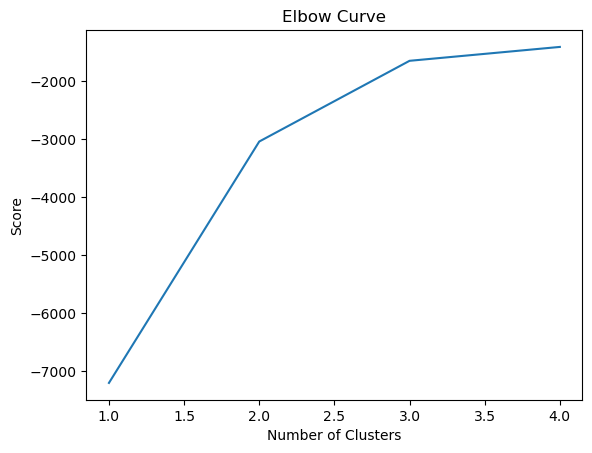

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Since the curve seems the flatten out at at then of the graph I believe this means that there are 4 clusters

### K means clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [23]:
# Fit the k-means object to the data.

kmeans.fit(scaled_df)

C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [32]:
scaled_df['clusters'] = kmeans.fit_predict(scaled_df)

C:\Users\Stugots\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
scaled_df['clusters'].value_counts()

clusters
0    48
3    24
2    24
1    24
Name: count, dtype: int64

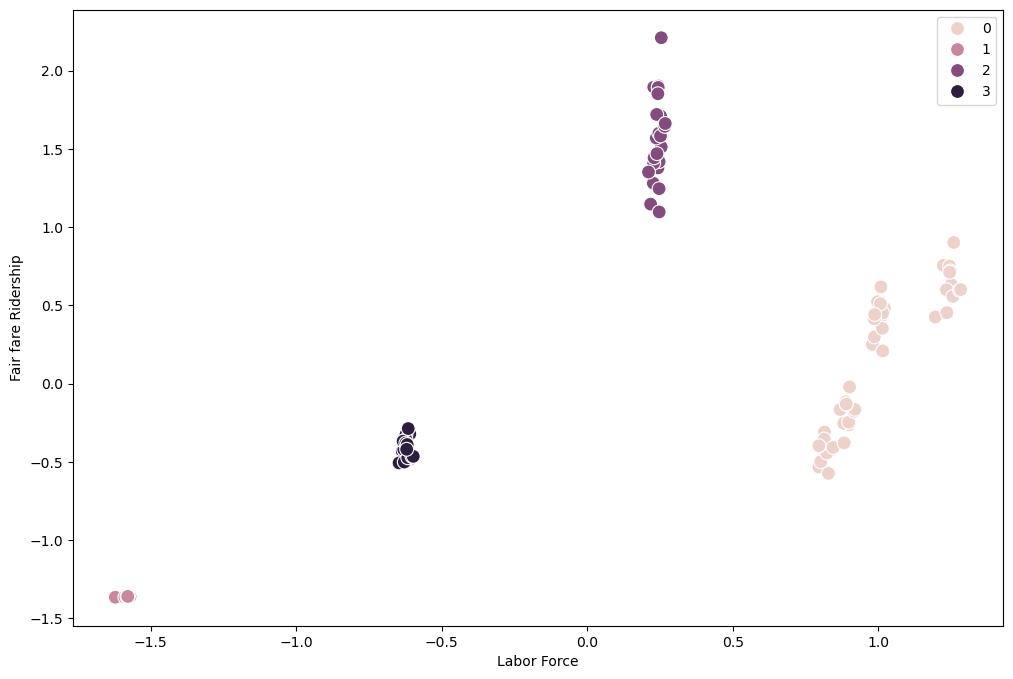

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['Labor Force'], y=scaled_df['ridership - Fair Fare'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Labor Force') # Label x-axis.
plt.ylabel('Fair fare Ridership') # Label y-axis.
plt.show()

It appers Staten Island and the Bronx have been considered to be the same cluster.

In [28]:
#creating total ridership column 
scaled_df["total ridership"] = (
    scaled_df["ridership - Fair Fare"] +
    scaled_df["ridership - Full Fare"] +
    scaled_df["ridership - Other"] +
    scaled_df["ridership - Seniors & Disability"] +
    scaled_df["ridership - Student"] +
    scaled_df["ridership_Metrocard - Unlimited 30-Day"] +
    scaled_df["ridership_Metrocard - Unlimited 7-Day"]
)

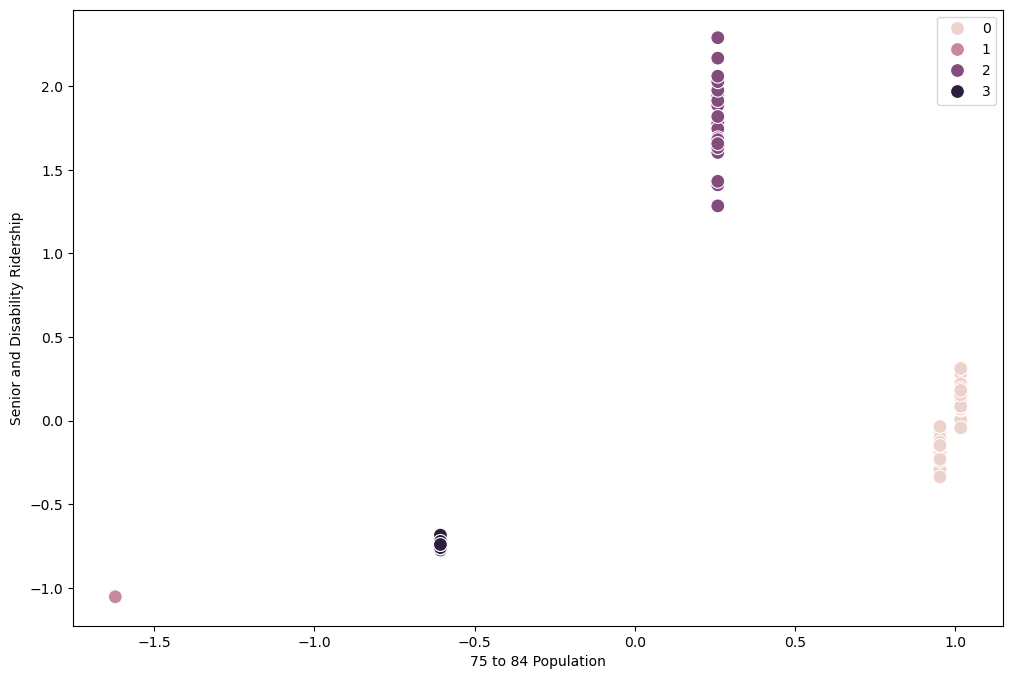

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['75 to 84 years'], y=scaled_df["ridership - Seniors & Disability"], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('75 to 84 Population') # Label x-axis.
plt.ylabel('Senior and Disability Ridership') # Label y-axis.
plt.show()

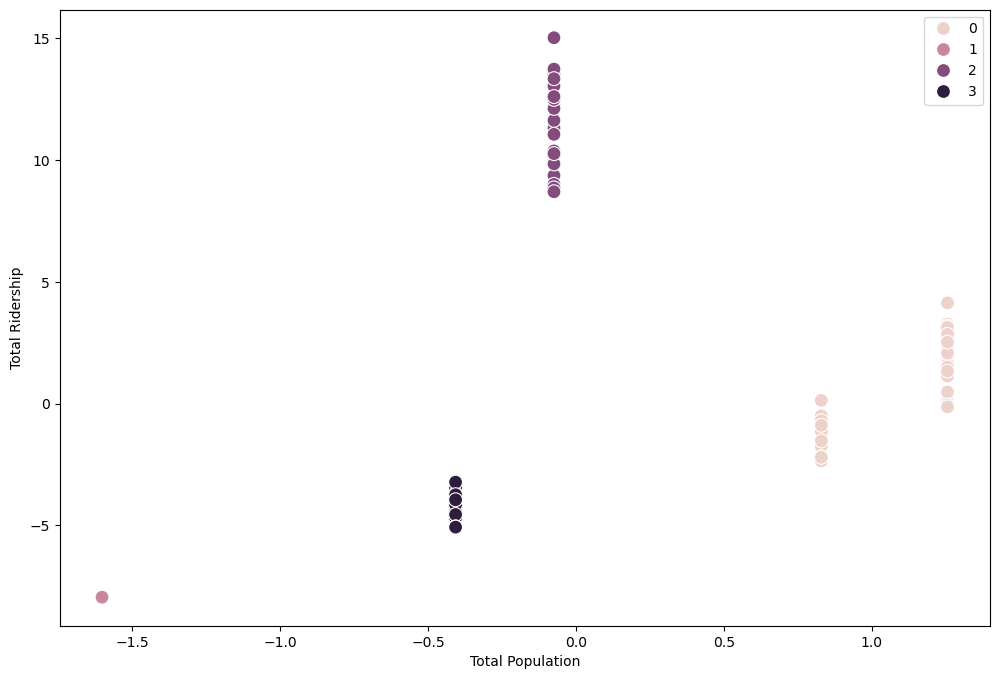

In [30]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_df['Total population'], y=scaled_df["total ridership"], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Population') # Label x-axis.
plt.ylabel('Total Ridership') # Label y-axis.
plt.show()

In [36]:
scaled_df.groupby('clusters').agg({"total ridership":['mean', 'median'], 
                         "ridership - Fair Fare":['mean', 'median'], 
                         "ridership - Full Fare":['mean', 'median'],
                          'Total housing units':['mean', 'median']})

total ridership            ridership - Fair Fare            \
                    mean     median                  mean    median   
clusters                                                              
0               0.322570  -0.094673              0.106040  0.093685   
1              -7.946564  -7.949553             -1.362901 -1.363982   
2              11.456605  11.494772              1.570784  1.575562   
3              -4.155182  -4.128998             -0.419964 -0.420718   

         ridership - Full Fare           Total housing units            
                          mean    median                mean    median  
clusters                                                                
0                    -0.124739 -0.150686            0.827293  0.827293  
1                    -0.936063 -0.936034           -1.687982 -1.687982  
2                     1.868070  1.896408            0.568618  0.568618  
3                    -0.682530 -0.681995           -0.535222 -0.535222

As the two smallest boroughs, the bronx and staten island are getting lumped into one cluster, since my data was already so clustered due to the stark differences between the boroughs you can almost argue that the clustering is making my analysis less precise by grouping those two boroughs together while not providing any new insights.